In [677]:
import numpy as np
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [678]:
data = pd.read_csv('StudentsPerformance.csv', delimiter=',')
data = data.drop(columns=['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
data.loc[data["gender"] == "male", "gender"] = 1
data.loc[data["gender"] == "female", "gender"] = 0
data.dropna()
print(data)#


    gender  math score  reading score  writing score
0        0          72             72             74
1        0          69             90             88
2        0          90             95             93
3        1          47             57             44
4        1          76             78             75
..     ...         ...            ...            ...
995      0          88             99             95
996      1          62             55             55
997      0          59             71             65
998      0          68             78             77
999      0          77             86             86

[1000 rows x 4 columns]


<ipython-input-679-af6154559dc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, fmt = '.3f')


<Axes: >

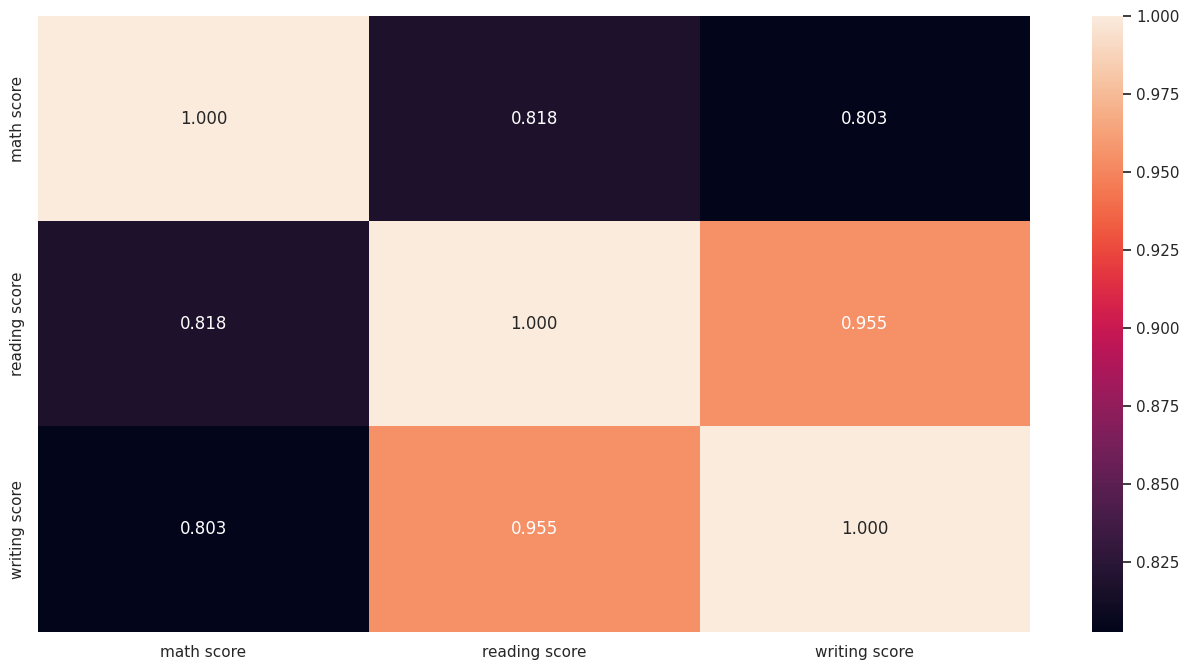

In [679]:
sns.set(rc = {'figure.figsize':(16, 8)})
sns.heatmap(data.corr(), annot = True, fmt = '.3f')

In [680]:
x=np.array(data[['math score', 'reading score', 'writing score']])#3 стовбчики у х
y=np.array(data['gender'])#назву у у


In [681]:
array_max = []#нормалізація
col_names = ['math score', 'reading score', 'writing score']
for col in col_names:
    x_col = np.array(data[col])
    x_max = max(x_col)
    array_max.append(x_max)
max_values = np.array(array_max)
x_normalized = x / max_values
x=x_normalized

In [682]:
pca=PCA(n_components=2)

In [683]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

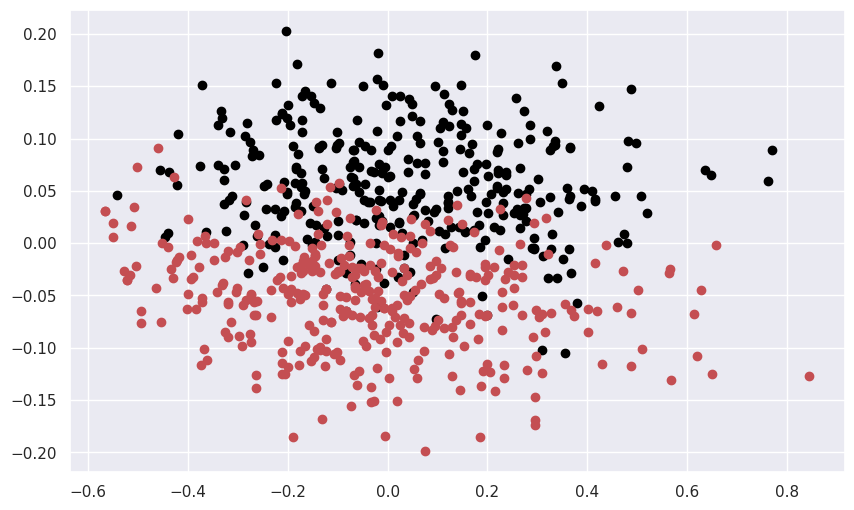

In [684]:
plt.figure(figsize=(10,6))
x_train_2=pca.fit_transform(x_train)
plt.plot(x_train_2[y_train==0,0],x_train_2[y_train==0,1],"or")
plt.scatter(x_train_2[y_train==1,0],x_train_2[y_train==1,1],c="black")
plt.grid(True)
plt.show()

KNN

In [685]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

In [686]:
knn_model = knn.fit(x_train, y_train)

In [687]:
y_pred = knn_model.predict(x_test)


In [688]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_test,y_pred))

[[143  38]
 [  9 110]]
0.8433333333333334


In [689]:
x_area=[]#малюємо цяточки
for i in range(-100,100, 1):
  for j in range(-100,100,1):
    x_area.append([i/100,j/100])
x_area = np.array(x_area)
y_area = knn_model.predict(pca.inverse_transform(x_area))

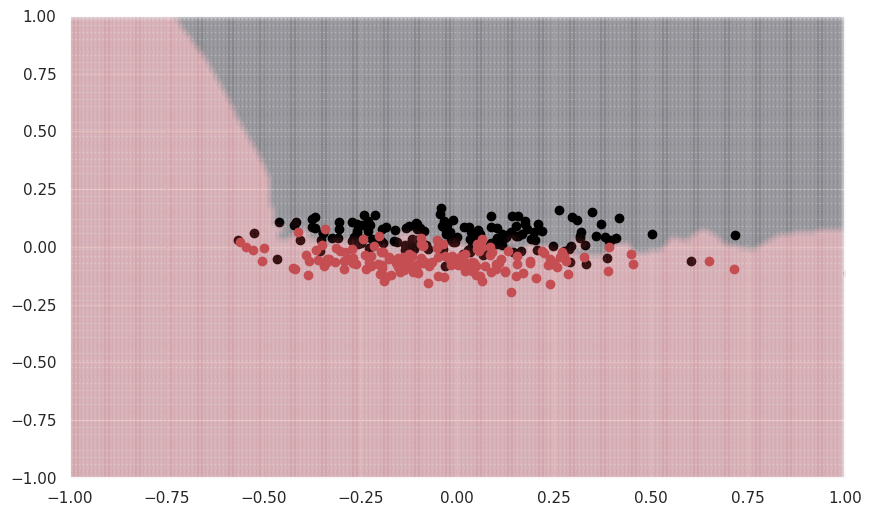

In [690]:
plt.figure(figsize=(10,6))#малюємо тестові точки як на 1 графіку а також цяточки
plt.xlim([-1, 1])
plt.ylim([-1, 1])
x_test_2 = pca.transform(x_test)
plt.plot(x_area[y_area==0,0], x_area[y_area==0,1], "or", alpha = 0.04)
plt.scatter(x_area[y_area==1,0], x_area[y_area==1,1], c="black", alpha = 0.04)
plt.plot(x_test_2[y_test==0,0], x_test_2[y_test==0,1], "or" )
plt.scatter(x_test_2[y_test==1,0], x_test_2[y_test==1,1], c="black")
plt.grid(True)
plt.show()

Дерево ухвалення рішення

In [691]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from random import randint


In [692]:
x0=data[['math score', 'reading score', 'writing score']]

In [693]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1).fit(x_train,y_train)
prediction_tree = tree.predict(x_test)
confusion_matrix(y_test,prediction_tree)


array([[120,  32],
       [ 30, 118]])

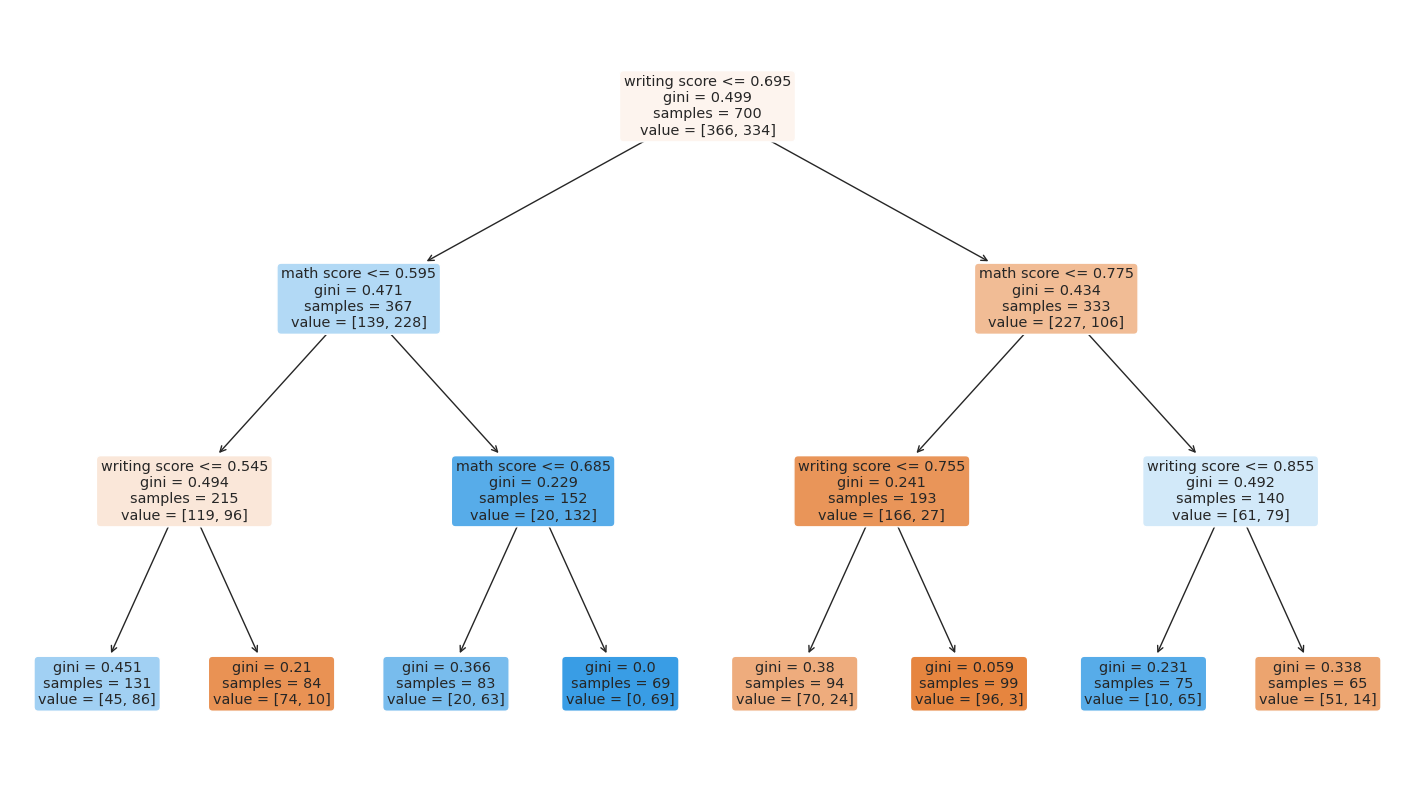

In [694]:
plt.figure(figsize=(18,10))
plot_tree(tree,filled=True,rounded=True,feature_names=x0.columns)
plt.show()


In [695]:
forest=RandomForestClassifier(criterion='gini',max_depth=3,random_state=1).fit(x_train,y_train)
prediction_forest=forest.predict(x_test)
confusion_matrix(y_test,prediction_forest)


array([[129,  23],
       [ 42, 106]])

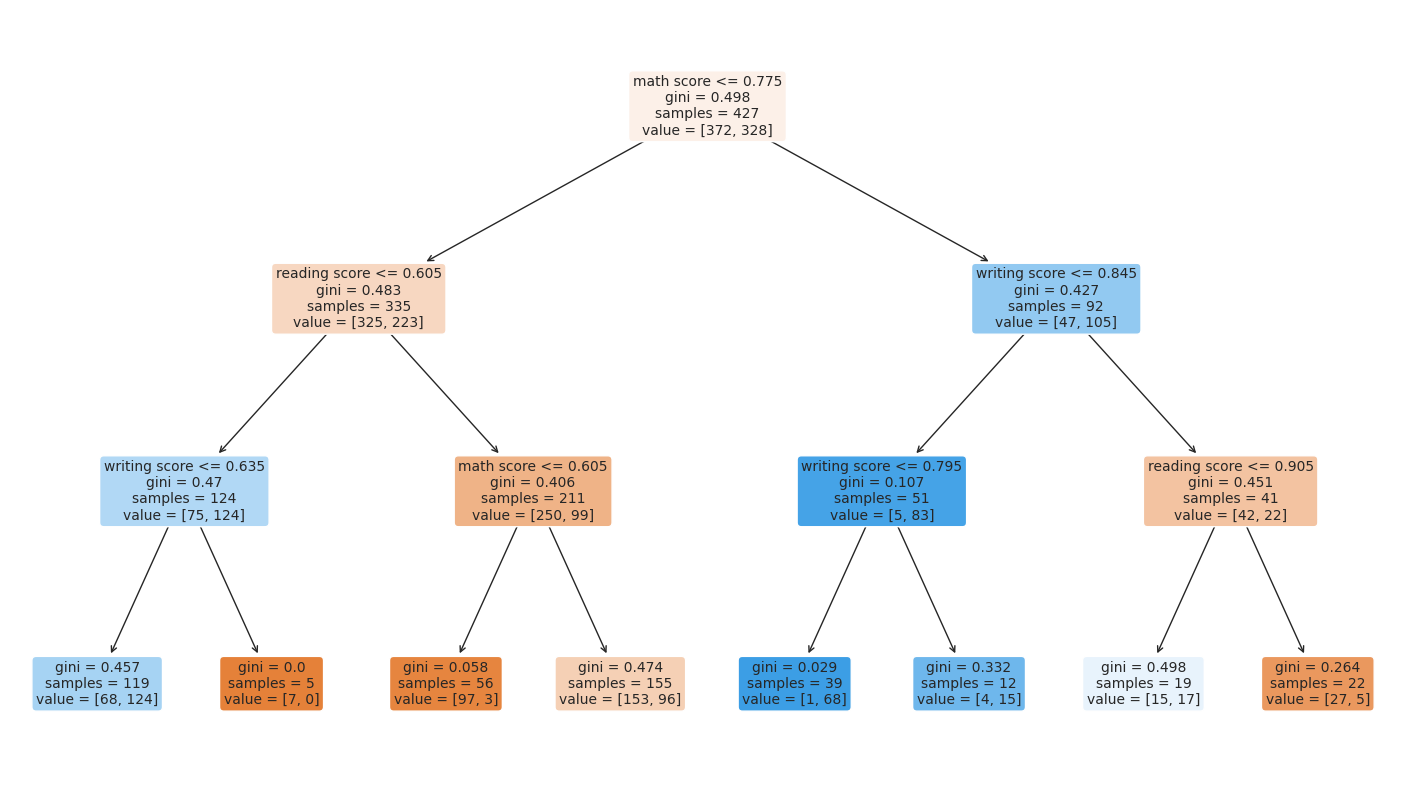

In [696]:
rand=randint(0,100)
plt.figure(figsize=(18,10))
plot_tree(forest.estimators_[rand],filled=True,rounded=True,feature_names=x0.columns)
plt.show()


In [697]:
print("DecisionTree:",accuracy_score(y_test,prediction_tree),"\nRandomForest:",accuracy_score(y_test,prediction_forest))

DecisionTree: 0.7933333333333333 
RandomForest: 0.7833333333333333


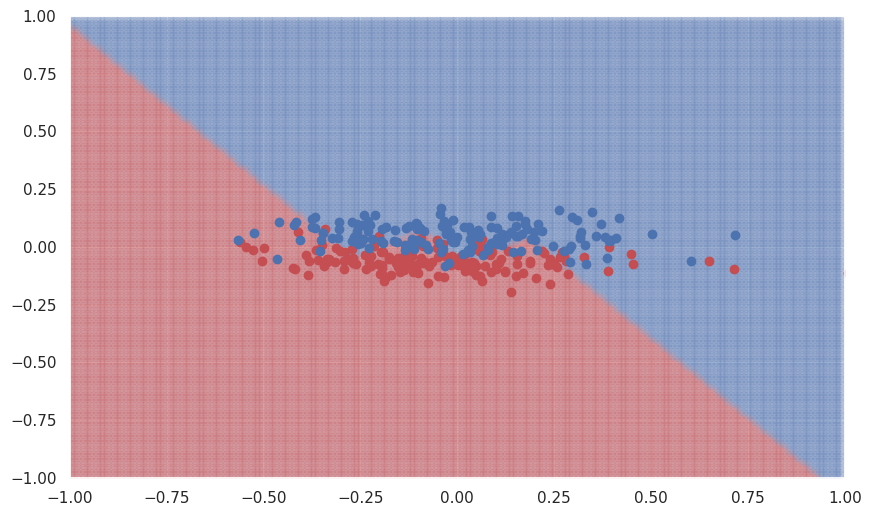

In [698]:
x_area=[]
for i in range(-90,90, 1):
  for j in range(-90,90,1):
    x_area.append([i/90,j/90])
x_area = np.array(x_area)
y_area = tree.predict(pca.inverse_transform(x_area))
plt.figure(figsize=(10,6))
plt.xlim([-1, 1])
plt.ylim([-1, 1])
x_test_2 = pca.transform(x_test)
plt.plot(x_area[y_area==0,0], x_area[y_area==0,1], "or", alpha = 0.1)
plt.plot(x_area[y_area==1,0], x_area[y_area==1,1], "ob", alpha = 0.1)
plt.plot(x_test_2[y_test==0,0], x_test_2[y_test==0,1], "or" )
plt.plot(x_test_2[y_test==1,0], x_test_2[y_test==1,1], "ob")
plt.grid(True)
plt.show()


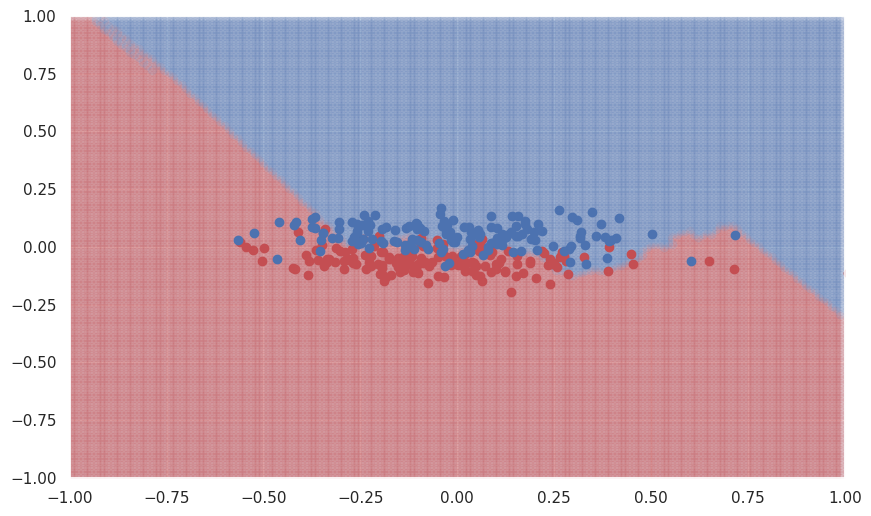

In [699]:
x_area=[]
for i in range(-90,90, 1):
  for j in range(-90,90,1):
    x_area.append([i/90,j/90])
x_area = np.array(x_area)
y_area = forest.predict(pca.inverse_transform(x_area))
plt.figure(figsize=(10,6))
plt.xlim([-1, 1])
plt.ylim([-1, 1])
x_test_2 = pca.transform(x_test)
plt.plot(x_area[y_area==0,0], x_area[y_area==0,1], "or", alpha = 0.1)
plt.plot(x_area[y_area==1,0], x_area[y_area==1,1], "ob", alpha = 0.1)
plt.plot(x_test_2[y_test==0,0], x_test_2[y_test==0,1], "or" )
plt.plot(x_test_2[y_test==1,0], x_test_2[y_test==1,1], "ob")
plt.grid(True)
plt.show()


SVM

In [700]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [701]:
grid = GridSearchCV(SVC(), param_grid, refit=True)

In [702]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [703]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [704]:
grid.best_estimator_

SVC(C=100, gamma=1)

In [705]:
clf_rbf = svm.SVC(kernel ='rbf',C=1000, gamma = 1)
clf_rbf.fit(x_train,y_train)
clf_rbf.score(x_train,y_train)

0.8857142857142857

In [706]:
y_pred=clf_rbf.predict(x_test)#матриця яка показує скільки даних вгадали
confusion_matrix(y_pred,y_test)

array([[140,  31],
       [ 12, 117]])

In [707]:
x_area=[]#малюємо цяточки
for i in range(-100,100, 1):
  for j in range(-100,100,1):
    x_area.append([i/100,j/100])
x_area = np.array(x_area)
y_area = clf_rbf.predict(pca.inverse_transform(x_area))

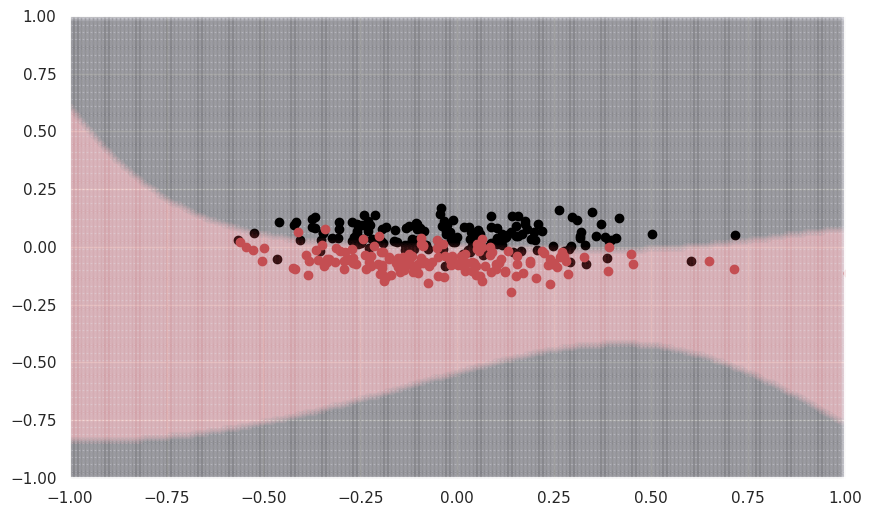

In [708]:
plt.figure(figsize=(10,6))#малюємо тестові точки як на 1 графіку а також цяточки
plt.xlim([-1, 1])
plt.ylim([-1, 1])
x_test_2 = pca.transform(x_test)
plt.plot(x_area[y_area==0,0], x_area[y_area==0,1], "or", alpha = 0.04)
plt.scatter(x_area[y_area==1,0], x_area[y_area==1,1], c="black", alpha = 0.04)
plt.plot(x_test_2[y_test==0,0], x_test_2[y_test==0,1], "or" )
plt.scatter(x_test_2[y_test==1,0], x_test_2[y_test==1,1], c="black")
plt.grid(True)
plt.show()

ADABOOST

In [709]:
from sklearn.ensemble import AdaBoostClassifier

In [710]:
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

In [711]:
adaboost.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [712]:
y_pred=adaboost.predict(x_test)

In [713]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_test,y_pred))

[[137  24]
 [ 15 124]]
0.87


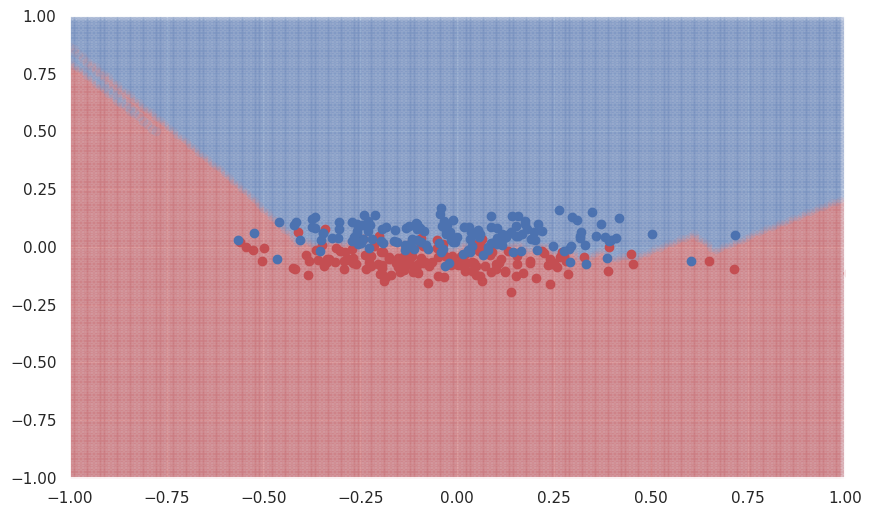

In [714]:
x_area=[]
for i in range(-90,90, 1):
  for j in range(-90,90,1):
    x_area.append([i/90,j/90])
x_area = np.array(x_area)
y_area = adaboost.predict(pca.inverse_transform(x_area))
plt.figure(figsize=(10,6))
plt.xlim([-1, 1])
plt.ylim([-1, 1])
x_test_2 = pca.transform(x_test)
plt.plot(x_area[y_area==0,0], x_area[y_area==0,1], "or", alpha = 0.1)
plt.plot(x_area[y_area==1,0], x_area[y_area==1,1], "ob", alpha = 0.1)
plt.plot(x_test_2[y_test==0,0], x_test_2[y_test==0,1], "or" )
plt.plot(x_test_2[y_test==1,0], x_test_2[y_test==1,1], "ob")
plt.grid(True)
plt.show()